# 1. Importando as bibliotecas

In [ ]:
# Minha função para importar dados do Bacen
from utils import inflacao

# Para visualização gráfica
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Para trabalhar com datas
from dateutil.relativedelta import relativedelta

# Para manipulação de dados
import pandas as pd

# Configurações padrões dos gráficos do matplotlib
plt.style.use('meuestilo.mplstyle')

# 2. Importando os dados de inflação

In [2]:
# Variação mensal(%)
df = inflacao(433)

In [3]:
df.head()

,valor
data,
1980-02-01,4.62
1980-03-01,6.04
1980-04-01,5.29
1980-05-01,5.70
1980-06-01,5.31


# 3. Análises

## 3.1 - Análise: Distribuição dos dados

In [4]:
dt_min = df.index.min()
dt_max = df.index.max()

diff = relativedelta(dt_max, dt_min)

print(f"Perído: {dt_min.strftime('%d/%m/%Y') } à {dt_max.strftime('%d/%m/%Y') }")
print(f"Registro histórico de {diff.years} anos")

Perído: 01/02/1980 à 01/06/2025
Registro histórico de 45 anos


In [5]:
df.shape

(545, 1)

In [6]:
# Verificando se existe valores nulos
df.isna().sum()

valor    0
dtype: int64

In [ ]:
# Número de linhas
len(df.index.unique())

545

In [38]:
df.tail()

,valor
data,
2025-02-01,1.31
2025-03-01,0.56
2025-04-01,0.43
2025-05-01,0.26
2025-06-01,0.24


In [39]:
df['valor'].describe()

count    545.000000
mean       5.632202
std       10.636150
min       -0.680000
25%        0.370000
50%        0.710000
75%        6.480000
max       82.390000
Name: valor, dtype: float64

* Maior variação mensal:

In [40]:
df.iloc[df['valor'].argmax()]

valor    82.39
Name: 1990-03-01 00:00:00, dtype: float64

* Menor variação mensal:

In [49]:
df.iloc[df['valor'].argmin()]

valor   -0.68
Name: 2022-07-01 00:00:00, dtype: float64

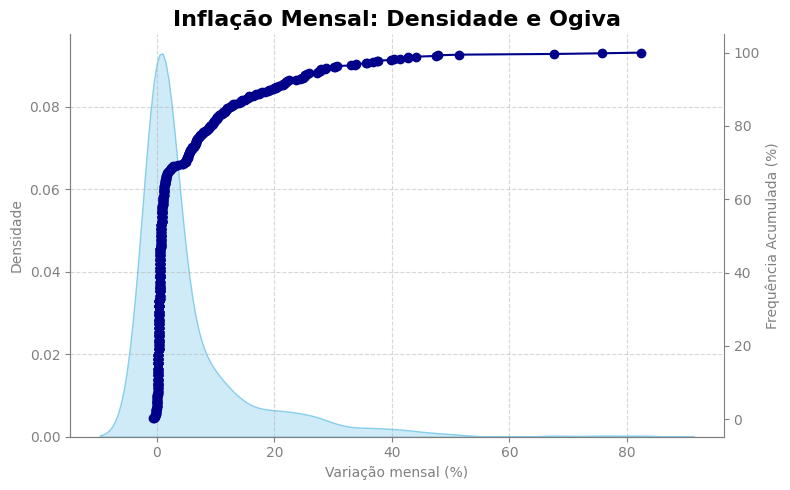

In [46]:
valores_ordenados = df['valor'].sort_values()
frequencia_acumulada = valores_ordenados.rank(method='max', pct=True) * 100

fig, ax1 = plt.subplots(figsize=(8, 5))

# KDE (densidade) no eixo primário
sns.kdeplot(df['valor'], ax=ax1, fill=True, color='skyblue', alpha=0.4)
ax1.set_xlabel('Variação mensal (%)')
ax1.set_ylabel('Densidade')
ax1.grid(True, linestyle='--', alpha=0.5)

# Ogiva no eixo secundário
ax2 = ax1.twinx()
ax2.plot(valores_ordenados, frequencia_acumulada, color='darkblue', marker='o', linestyle='-')
ax2.set_ylabel('Frequência Acumulada (%)')
ax2.spines['right'].set_visible(True)

# Título
plt.title('Inflação Mensal: Densidade e Ogiva')

plt.tight_layout()
plt.show()

Insights:

1. A média das variações mensais é de 5,63%, enquanto a mediana é de 0,71%, o que sugere uma distribuição assimétrica à direita.
2. O terceiro quartil (Q3 = 6,48%) indica que 75% das variações mensais ficaram abaixo desse valor.
3. A maior variação foi em março de 1990, apresentando um valor de 82,39%. Já a menor foi em julho de 2022, cuja o valor foi de -0,68%.
---

## 3.2 - Análise: Inflação ao longo do tempo

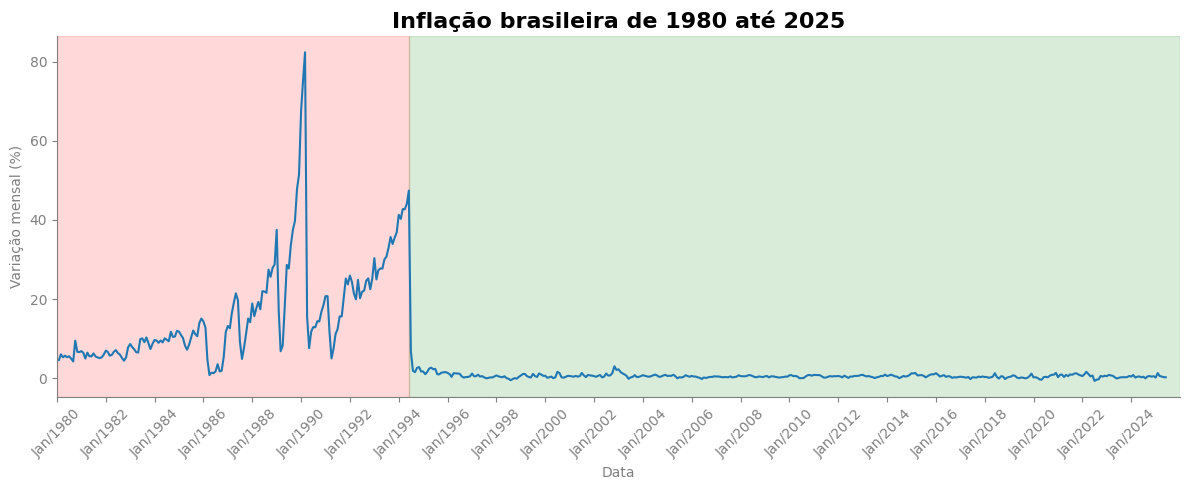

In [48]:
plt.plot(df.index, df['valor'])
plt.xlabel('Data')
plt.ylabel('Variação mensal (%)')
plt.title('Inflação brasileira de 1980 até 2025')

plt.axvspan(pd.Timestamp('1980-01-01'), pd.Timestamp('1994-06-01'), alpha=0.15, color="red")
plt.axvspan(pd.Timestamp('1994-06-02'), pd.Timestamp('2025-12-31'), alpha=0.15, color="green")

locator = mdates.YearLocator(2, month=1)   
formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim(pd.Timestamp('1980-01-01'), pd.Timestamp('2025-12-31'))

plt.xticks(rotation=45)
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

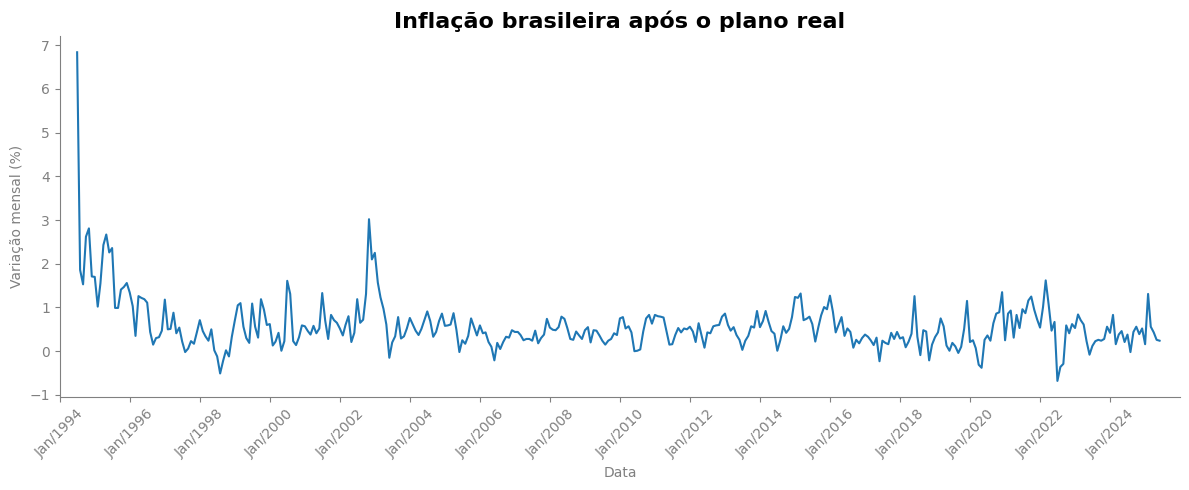

In [33]:
df_filter = df[df.index >= pd.Timestamp('1994-07-01')]

plt.plot(df_filter.index, df_filter['valor'])
plt.xlabel('Data')
plt.ylabel('Variação mensal (%)')
plt.title('Inflação brasileira após o plano real')

locator = mdates.YearLocator(2, month=1)   
formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim(pd.Timestamp('1994-01-01'), pd.Timestamp('2025-12-31'))

plt.xticks(rotation=45)
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

Insights:

1. O gráfico evidencia que a inflação brasileira passou por um período de grande instabilidade entre 1980 e 1994, marcado por altas variações mensais nos preços. Esse intervalo é amplamente reconhecido como o período da hiperinflação, caracterizado por sucessivas falhas de políticas econômicas e tentativas de estabilização monetária.

2. A partir de 1994, com a implementação do Plano Real, observa-se uma redução significativa na inflação mensal, refletida em uma estabilidade maior dos preços ao longo dos anos seguintes.

---

## 3.3 - Análise: Inflação acumulada

In [56]:
# FIltrando os dados
df_After_PlanoReal = df[df.index >= pd.Timestamp('1994-07-01')]

# CAlculando o retorno
ret_acumulado = ((1 + df_After_PlanoReal['valor']/100).cumprod() - 1) * 100

# Ajuste de período inicial
date_init = ret_acumulado.index.min() - relativedelta(months=1)
ponto_inicial = pd.Series(data=[0], index = [date_init])

ret_acumulado = pd.concat([ponto_inicial, ret_acumulado])
ret_acumulado = ret_acumulado.sort_index()

In [57]:
ret_acumulado

1994-06-01      0.000000
1994-07-01      6.840000
1994-08-01      8.827224
1994-09-01     10.492281
1994-10-01     13.387178
                 ...    
2025-02-01    740.456767
2025-03-01    745.163325
2025-04-01    748.797527
2025-05-01    751.004401
2025-06-01    753.046811
Length: 373, dtype: float64

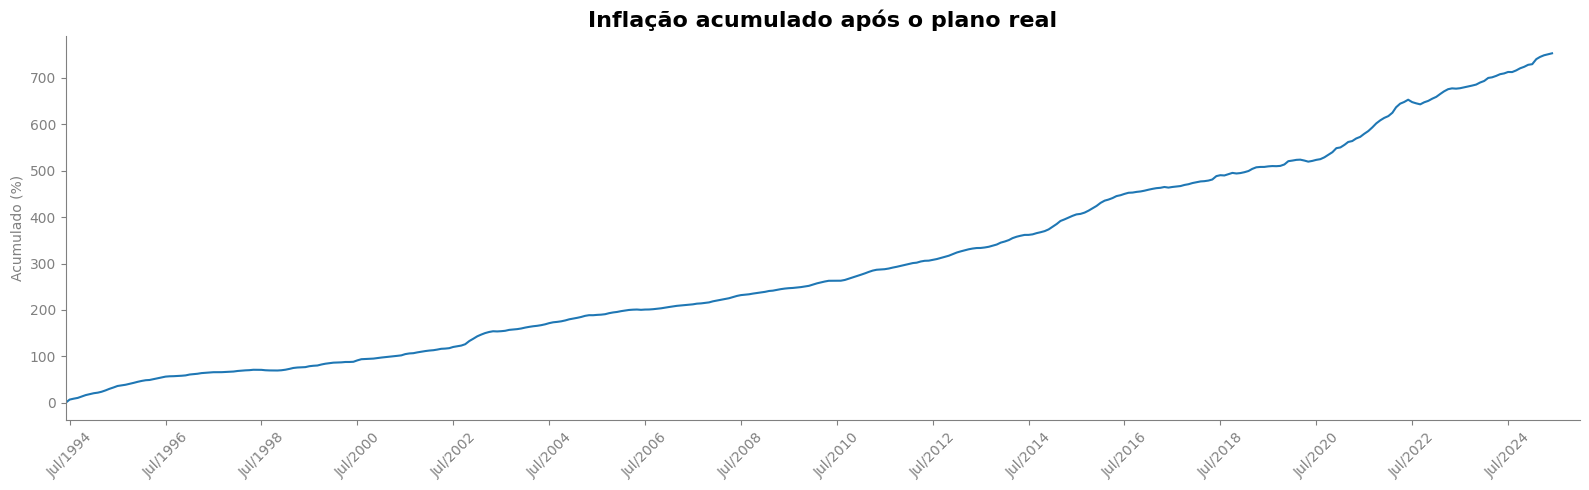

In [83]:
# Plotando gráfico
plt.figure(figsize=(16, 5))

plt.plot(ret_acumulado.index, ret_acumulado.values)
plt.ylabel('Acumulado (%)')
plt.title('Inflação acumulado após o plano real')

locator = mdates.YearLocator(2, month=7)   
formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim(pd.Timestamp('1994-06-01'), pd.Timestamp('2025-12-31'))

plt.xticks(rotation=45)
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

In [85]:
inflacao_acumulada = ret_acumulado.iloc[-1]
print(f"A inflação acumulado desde o plano real até hoje é de: {inflacao_acumulada:.2f}%")

A inflação acumulado desde o plano real até hoje é de: 753.05%


In [86]:
valor_1994 = 100
fator_correcao = inflacao_acumulada/100 + 1
valor_2025 = valor_1994 * fator_correcao

print(f"Fator de correção: {fator_correcao:.2f}")
print(f"Isso significa que R${valor_1994:.2f} em 1994, reajustado pela inflação, hoje valeria R${valor_2025:.2f}")

Fator de correção: 8.53
Isso significa que R$100.00 em 1994, reajustado pela inflação, hoje valeria R$853.05


Insights:
1. Desde a implementação do Plano Real, em julho de 1994, a inflação acumulada no Brasil atingiu aproximadamente 753% até 2025. Isso significa que um item que custava R\$100,00 em 1994, hoje teria um valor equivalente a R\$853,00, considerando apenas o efeito da inflação ao longo do período.

    Esse comportamento reflete a natureza cumulativa da inflação, mesmo em um cenário de estabilidade relativa. A trajetória ascendente da curva mostra que, apesar da estabilização de preços obtida com o Plano Real, a inflação continuou presente, embora em patamares muito inferiores aos da era hiperinfacionária.
---

## 3.4 - Análise: Crescimento anual médio desde 2000

Para calcularmos o crescimento anual médio, utilizaremos a fórmula da capitalização composta:

$$VF = VP * (1 + i)^{n}$$

Isolando a taxa, temos:
$$ i = (\frac{VF}{VP})^{\frac{1}{n}} - 1$$

Como temos apenas os dados de inflação mensal, deve-se calcular a inflação acumulada nesse período para depois utilizar a fórumla acima.


In [87]:
# Filtrando os dados
df_2000 = df[df.index >=  pd.Timestamp("2000-01-01")]
df_2000.head()

,valor
data,
2000-01-01,0.62
2000-02-01,0.13
2000-03-01,0.22
2000-04-01,0.42
2000-05-01,0.01


In [88]:
date_init = df_2000.index.min() - relativedelta(months=1)
ponto_inicial = pd.Series(data=[0], index = [date_init])

df_2000 = pd.concat([ponto_inicial, df_2000['valor']])
df_2000 = df_2000.sort_index()

inflacao_acumulado_2000_2025 = ((1 + df_2000/100).cumprod() - 1) * 100

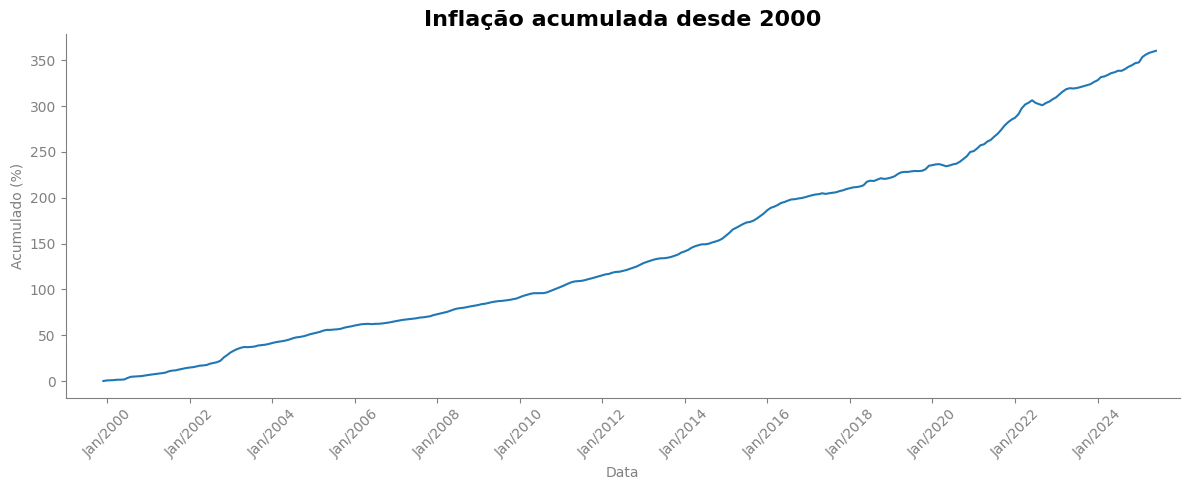

In [89]:
plt.plot(inflacao_acumulado_2000_2025.index, inflacao_acumulado_2000_2025.values)
plt.xlabel('Data')
plt.ylabel('Acumulado (%)')
plt.title('Inflação acumulada desde 2000')

locator = mdates.YearLocator(2)   
formatter = mdates.DateFormatter('%b/%Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2025-12-31'))

plt.xticks(rotation=45)
plt.grid(False)

sns.despine()
plt.tight_layout()
plt.show()

In [90]:
inflacao_acumulada = inflacao_acumulado_2000_2025.iloc[-1]/100
indice_de_correcao = inflacao_acumulada + 1

print(f"Índice de correção no período: {indice_de_correcao:.2%}")
print(f"Inflação acumulada no período: {inflacao_acumulada:.2%}")

Índice de correção no período: 460.36%
Inflação acumulada no período: 360.36%


Ou seja, R\$1,00 hoje custaria, aproximadamente, R\$4,60.

In [ ]:
VP = 1
VF = 4.6
n = 2025 - 2000

i = (VF/VP)**(1/n) - 1

print("Nesse caso, o crescimento anual médio da inflação é proximo de:")
print(f"i = {i:.2%} a.a")

Nesse caso, o crescimento anual médio da inflação é proximo de:
i = 6.29% a.a


Insights:
1. **Inflação acumulada desde 2000**<br>
   De 2000 até 2025, a inflação acumulada no Brasil foi de aproximadamente 360,36%. Isso implica um índice de correção de 460,36%, considerando o valor inicial (100%).
   Em termos práticos, R\$1,00 em 2000 teria o poder de compra equivalente a R\$4,60 em 2025.

2. **Inflação média anual (taxa composta)** <br>
   Ao aplicar a fórmula da capitalização composta e isolar a taxa de crescimento, obtém-se uma inflação média anual de aproximadamente 6,29% no período de 25 anos (2000–2025).
   Essa taxa representa o crescimento médio contínuo dos preços ano após ano, mesmo com variações mensais pontuais.
---

## 3.5 - Análise: Inflação acumulada para outro períodos

In [91]:
df_geral = df.copy()

In [92]:
# Calculando as variações com para outras janelas.
fator = 1 + df_geral['valor'] / 100

df_geral['ANO'] = df_geral.index.year
df_geral['MES_NUMBER'] = df_geral.index.month
df_geral['MES_NAME'] = df_geral.index.strftime('%b')

df_geral['3 MESES'] = (fator.rolling(window=3).apply(lambda x: x.prod() - 1, raw=True) * 100)
df_geral['6 MESES'] = (fator.rolling(window=6).apply(lambda x: x.prod() - 1, raw=True) * 100)
df_geral['12 MESES'] = (fator.rolling(window=12).apply(lambda x: x.prod() - 1, raw=True) * 100)
df_geral['AO ANO'] = (fator.groupby(df_geral['ANO']).cumprod() - 1) * 100

df_geral.index.name = 'DATA'
df_geral.rename(columns={"valor": "AO MES"}, inplace=True)
df_geral = df_geral.reindex(columns=['ANO', 'MES_NUMBER', 'MES_NAME', "AO MES", "3 MESES", "6 MESES", "12 MESES", "AO ANO"])

In [93]:
df_geral.tail(18)

,ANO,MES_NUMBER,MES_NAME,AO MES,3 MESES,6 MESES,12 MESES,AO ANO
DATA,,,,,,,,
2024-01-01,2024,1,Jan,0.42,1.265103,2.006136,4.506637,0.420000
2024-02-01,2024,2,Feb,0.83,1.820506,2.616768,4.496274,1.253486
2024-03-01,2024,3,Mar,0.16,1.415492,2.514417,3.925596,1.415492
2024-04-01,2024,4,Apr,0.38,1.375095,2.657594,3.688016,1.800870
2024-05-01,2024,5,May,0.46,1.003095,2.841862,3.925952,2.269154
2024-06-01,2024,6,Jun,0.21,1.053516,2.483920,4.227578,2.483920
2024-07-01,2024,7,Jul,0.38,1.053516,2.443098,4.498245,2.873359
2024-08-01,2024,8,Aug,-0.02,0.570680,1.579499,4.237599,2.852784
2024-09-01,2024,9,Sep,0.44,0.801508,1.863467,4.424740,3.305336


In [94]:
# Filtrando os dados a partir de 2000
df_filter_2000 = df_geral[df_geral.index >= pd.Timestamp("2000-01-01")]

df_anual = df_filter_2000.groupby("ANO")['AO ANO'].nlargest(1)
df_anual = df_anual.reset_index()
df_anual.set_index(['DATA'], inplace=True)

df_anual.head()

,ANO,AO ANO
DATA,,
2000-12-01,2000,5.974339
2001-12-01,2001,7.673263
2002-12-01,2002,12.530337
2003-12-01,2003,9.299949
2004-12-01,2004,7.600644


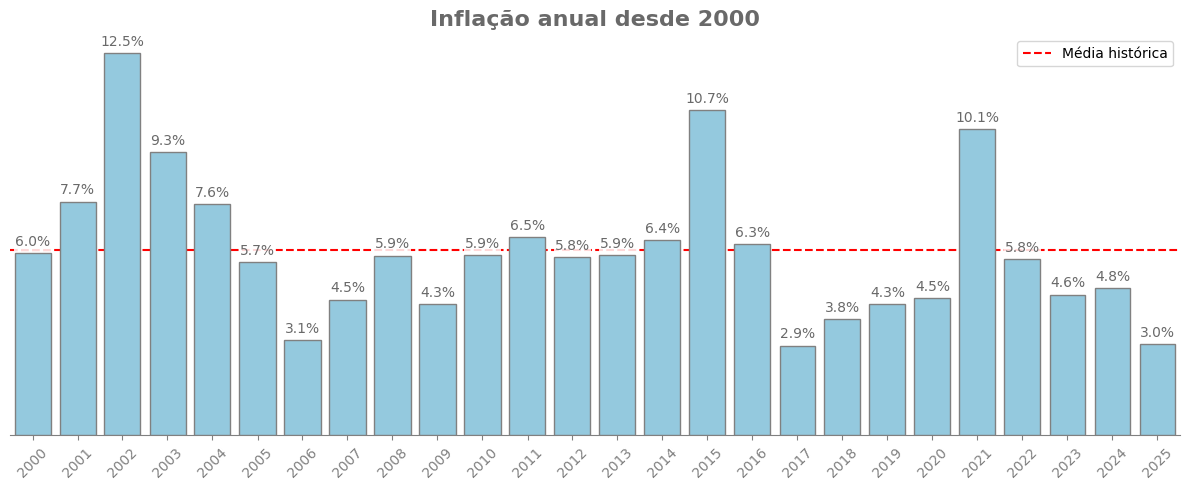

In [119]:
ax = sns.barplot(data=df_anual, x='ANO', y='AO ANO', color='skyblue', edgecolor='gray', zorder=3)
plt.axhline(df_anual['AO ANO'].mean(), linestyle='--', color='red', zorder=1, label='Média histórica')

plt.title('Inflação anual desde 2000', fontsize=16, color='dimgray', fontweight='bold')
plt.xlabel(None)
plt.ylabel(None)

plt.xticks(rotation=45)

ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', left=False, labelleft=False)

for p in ax.patches:
    altura = p.get_height()
    ax.annotate(f'{altura:.1f}%',
                xy=(p.get_x() + p.get_width() / 2, altura),
                xytext=(0, 3), 
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, color='dimgray',
                 bbox=dict(facecolor='white', edgecolor='none', pad=1, alpha=0.85))

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Insights:
1. Embora a inflação brasileira não tenha retornado aos níveis críticos observados na década de 1990, ela permaneceu presente de forma consistente ao longo dos anos. Entre 2000 e 2025, a inflação anual média foi de aproximadamente 6%, indicando um cenário de estabilidade relativa, mas ainda com perdas acumuladas no poder de compra.
---

# 4. Conclusão

1. A trajetória da inflação no Brasil, desde a década de 1980, revela dois momentos bastante distintos. Entre 1980 e 1994, o país viveu um cenário de hiperinflação, com variações mensais que, em alguns casos, ultrapassaram os 80%. Esse período foi marcado por forte instabilidade econômica.

2. A partir de 1994, com a implantação do Plano Real, houve uma ruptura significativa nesse padrão. A inflação passou a operar em níveis muito mais baixos e controlados. Mesmo assim, a inflação continuou a fazer parte da realidade econômica brasileira.

3. Analisando o período de 2000 a 2025, observa-se uma inflação acumulada de 360,36%, o que equivale a um índice de correção de 460,36% — ou seja, R\$1,00 em 2000 teria um poder de compra equivalente a R\$4,60 em 2025. A taxa média de crescimento anual nesse período foi de aproximadamente 6,29%.

4. Esses resultados mostram que, apesar dos avanços em estabilidade desde o Plano Real, a inflação continua sendo uma variável estrutural da economia brasileira, exigindo atenção constante de governos, empresas e da população em geral.